# Telecom Customer Churn Prediction

![Churn Overview](images/telc.jpg)

## Project Overview
This project explores customer churn in a telecom company. The goal is to analyze customer behavior, identify patterns associated with churn, and build a model that predicts which customers are likely to leave.

## Business Problem
**As a stakeholder:**  
In a growing telecom company, I’ve observed a troubling pattern — we’re losing customers at an increasing rate each month. Despite competitive pricing and a wide range of services, customer churn continues to rise, cutting into our recurring revenue and increasing customer acquisition costs.
From our current customer data, out of 7,043 customers, 1,869 have churned — that's roughly 26.5% of our customer base. This is a significant red flag.
After several internal reviews, it's clear that retaining existing customers is more cost-effective than acquiring new ones. But we currently lack a systematic approach to identify which customers are likely to leave — and why.


### Objectives:
- Understand which factors most influence churn
- Build a model to predict the likelihood of churn
- Provide actionable recommendations to reduce churn

## Dataset Description

**Source:** [Kaggle - Telco Customer Churn](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)

The dataset contains 21 columns including:
- Customer demographics
- Account information
- Services subscribed
- Monthly charges
- Whether they churned (`Churn`)

## Load and Inspect the Data

In [713]:
#Importing Nesecary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

sns.set(style="whitegrid", rc={
    'axes.grid': True,
    'axes.grid.axis': 'y',
    'grid.color': 'dimgray',
    'grid.linestyle': '-',
    'grid.linewidth': 0.7
})
%matplotlib inline

In [714]:
# Load dataset
df = pd.read_csv("Data\WA_Fn-UseC_-Telco-Customer-Churn.csv")

print("Shape of dataset:", df.shape)
df.head()


Shape of dataset: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## CLEANING AND EDA

### CLEANING

In [717]:
# Checking for missing values and duplicates
print(df.isna().sum(), '\n')
print(f'Number of duplicated rows: {df.duplicated().sum()}')

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64 

Number of duplicated rows: 0


In [718]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [719]:
df.shape

(7043, 21)

In [720]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [721]:
# Check the traget class distribution
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

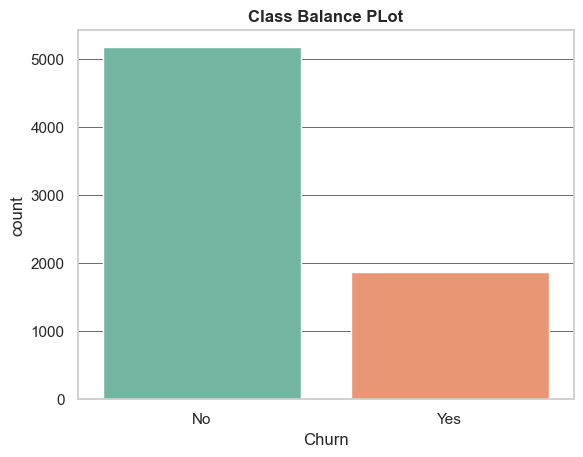

In [722]:
# Visualizimg churn count
sns.countplot(x = 'Churn', data = df, hue = 'Churn', palette = 'Set2')
plt.title('Class Balance PLot', weight = 'bold')
plt.show()

The plot above shows how our classes are distributed showing that the number of people who churn is less so we might need to use class balancing later on

- Now we can drop the data columns we will not use for this project

In [725]:
df = df.drop(columns = ['customerID'])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


We can now devide the data into the customers who churn and those who did not to look for patterns in their own data sets.

Ploting them side by side or within the same plot will help us see how the data is different from the other.

#### Looking at How Monthly Rates Affect Churing

In [728]:
#Spliting the data into two sets(Churned and not churned)
df_churned = df[df['Churn'] == 'Yes']
df_not_churned = df[df['Churn'] == 'No']

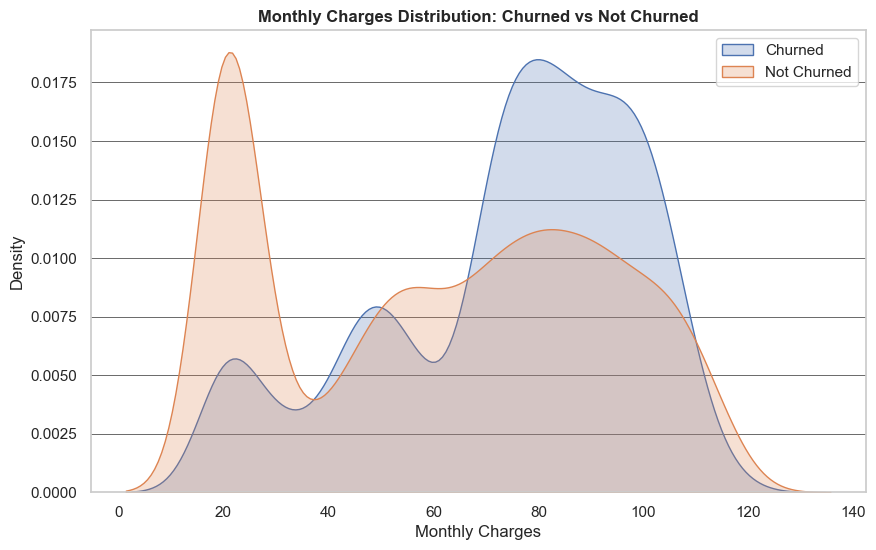

In [729]:
plt.figure(figsize=(10,6))
sns.kdeplot(df_churned['MonthlyCharges'], label='Churned', shade=True)
sns.kdeplot(df_not_churned['MonthlyCharges'], label='Not Churned', shade=True)
plt.title('Monthly Charges Distribution: Churned vs Not Churned', weight = 'bold')
plt.xlabel('Monthly Charges')
plt.legend()
plt.savefig('images\Monthly Rates VS Churing.jpg', dpi=300, bbox_inches='tight')
plt.show()

The plot above show a density curve plot of how monthly rates affect if a customers churns or not

**OBSERVATION**
- Churned are left-Skewed
- Not Churned are right-skewed

**CONCLUSION** 

Higher Monthly Charges are more likely to churn
- The peak for churned customers is between $70 and $100, where their density is much higher than that of non-churned customers
- This suggests that customers paying higher monthly charges are more likely to churn

Lower Monthly Charges are less likely to churn
- The not churned group (orange) shows a strong peak around $20, a region where the churned group is relatively low.
- This indicates that customers paying low monthly charges tend to stay

#### Looking If Gender Affects Churning

In [733]:
# first we need to know if the class is balanced to get a better reading
df['gender'].value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

So the data is balnced now to look at how it afftects churning

Churn         No       Yes
gender                    
Female  0.730791  0.269209
Male    0.738397  0.261603


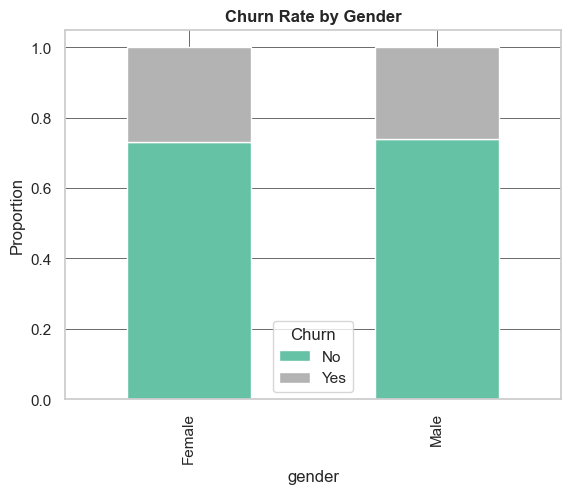

In [735]:
churn_by_gender = df.groupby('gender')['Churn'].value_counts(normalize=True).unstack()
print(churn_by_gender)

churn_by_gender.plot(kind='bar', stacked=True, colormap='Set2')
plt.title('Churn Rate by Gender', weight = 'bold')
plt.ylabel('Proportion')
plt.savefig('images\Gender VS Churning.jpg', dpi=300, bbox_inches='tight')
plt.show()

So gender does not carry too much based on the plot above since the number of churned is almost similar in both genders

#### Contract vs Churning

Here we will look at how contracts(month-month, one year, two years) affect churing

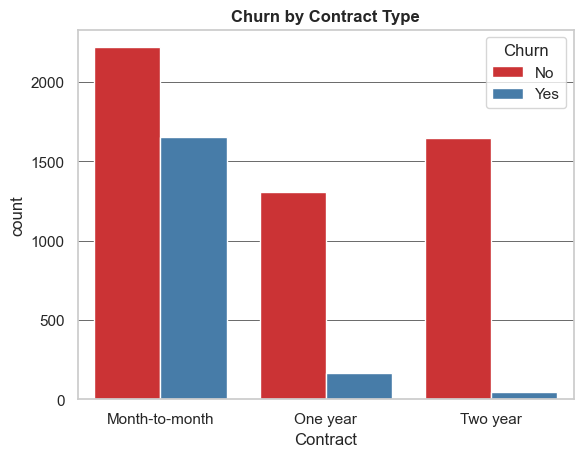

In [739]:
sns.countplot(x='Contract', hue='Churn', data=df, palette='Set1')
plt.title('Churn by Contract Type', weight = 'bold')
plt.xticks(rotation=0)
plt.savefig('images\Contract VS Churning.jpg', dpi=300, bbox_inches='tight')
plt.show()

The plot shows that most people who churn the services are the month-month customers

**CONCLUSION**
- getting cusstomers to commit to longer contracts will reduce churning

**RECOMENDATION**
- Offer incentives (like discounts, perks, or exclusive services) to month-to-month customers to convert them to longer contracts and reduce churn.

#### Tenure(How Long the in Months a customer has stayed with the company) VS Churn

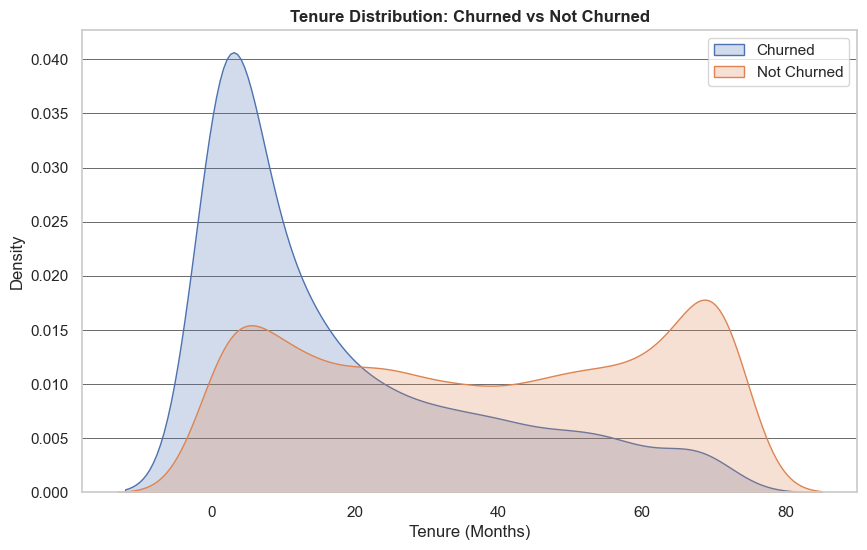

In [742]:
plt.figure(figsize=(10,6))
sns.kdeplot(df_churned['tenure'], label='Churned', shade=True)
sns.kdeplot(df_not_churned['tenure'], label='Not Churned', shade=True)
plt.title('Tenure Distribution: Churned vs Not Churned', weight = 'bold')
plt.xlabel('Tenure (Months)')
plt.legend()
plt.savefig('images\Tenure VS Churning.jpg', dpi=300, bbox_inches='tight')
plt.show()

This plot above shows a density curve of how tenure is distributed between churned and not churned customers

The observation and conclusion is that customers that have less tenure are more likely to churn the services while the customers who don't have a rather long tenure with the company

**Recomendation :** We try and get the customer to commit for about 6-12 months to reduce the chance of churning

#### Churning VS Internet Service types

In [745]:
#1st Look how this class is balanced
df['InternetService'].value_counts()

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

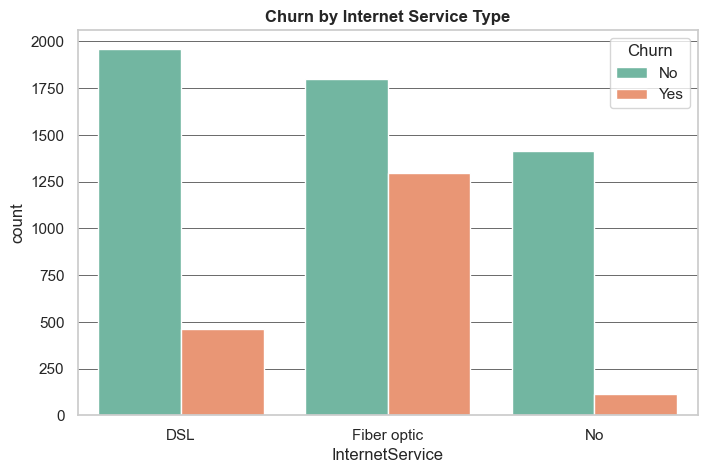

In [746]:
plt.figure(figsize=(8,5))
sns.countplot(x='InternetService', hue='Churn', data=df, palette='Set2')
plt.title('Churn by Internet Service Type', weight = 'bold')
plt.savefig('images\Internet Service Type VS Churning.jpg', dpi=300, bbox_inches='tight')
plt.show()

**CONCLUSION**
- Customers using Fiber optic internet are churning at higher rates compared to those using DSL or no internet service.

**RECOMENDATION**
- To reduce churn, consider offering incentives or easy options to switch internet service types, especially from fiber optic to other available options that might better fit customer needs or satisfaction

#### Churning VS Payment method

In [749]:
# Looking at the data in the Payment Method Column
df['PaymentMethod'].value_counts()

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

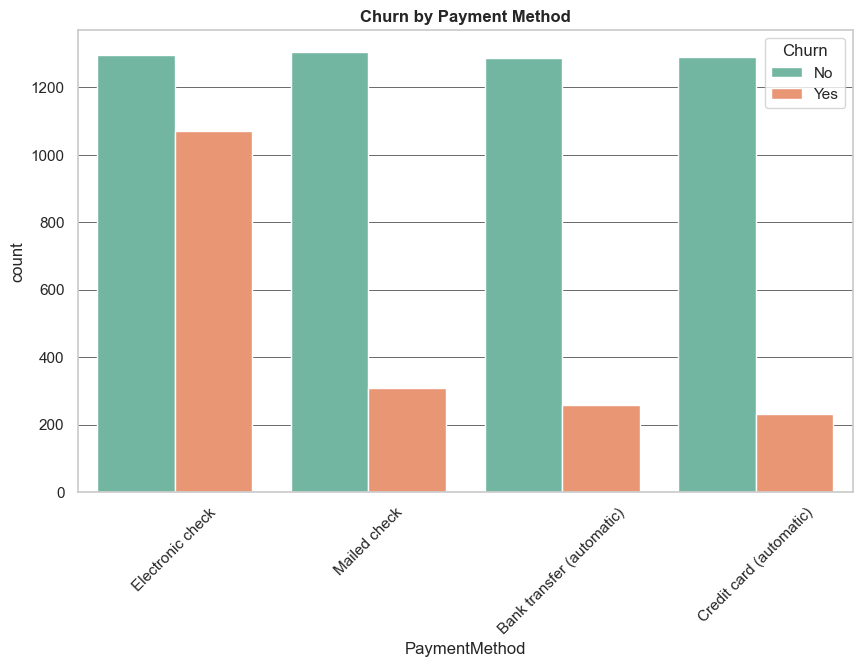

In [750]:
plt.figure(figsize=(10,6))
sns.countplot(x='PaymentMethod', hue='Churn', data=df, palette='Set2')
plt.title('Churn by Payment Method', weight = 'bold')
plt.xticks(rotation=45)
plt.savefig('images\Payment VS Churning.jpg', dpi=300, bbox_inches='tight')
plt.show()

**OBSERVATION**
- Though the payment methods are roughly almost the same in termsof the number of customers who use them Electronic check has a much higher churn rate than the others

**RECOMENDAION**
- Investigate why customers who use Electronic check have a higher rate than the rest

#### SeniorCitizen VS Churn

In [753]:
# Look at the distribution of Senior citizens columns
df['SeniorCitizen'].value_counts()

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

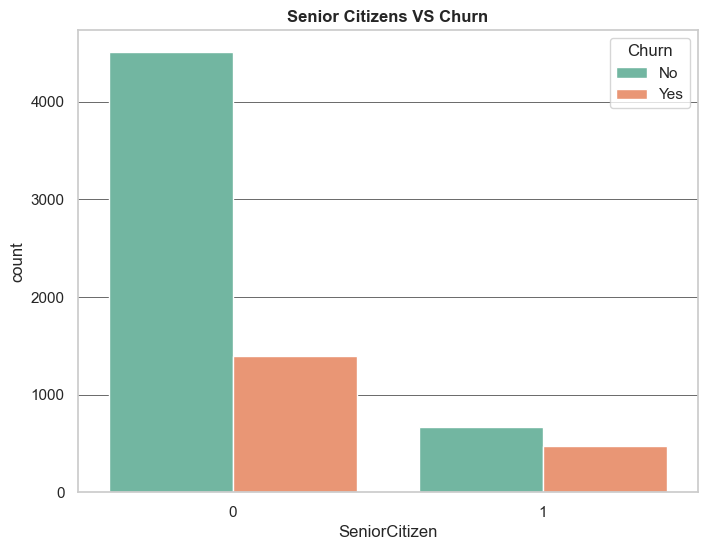

In [754]:
plt.figure(figsize=(8,6))
sns.countplot(x = 'SeniorCitizen', hue = 'Churn', data = df, palette = 'Set2')
plt.title('Senior Citizens VS Churn', weight = 'bold')
plt.savefig('images\Senior Citizens VS Churning.jpg', dpi=300, bbox_inches='tight')
plt.show()

**OBSERVATION**
- Based on the plot above the percentage of senior citizens who churn is higher than the the non-senior citizens 

**C0NCLUSION**
- Offer more serices that are more suitable to senior citizens to discarouge churning

## MODELING 

### Data Preprocessing

#### 1. Drop unnecessary columns

In [759]:
df = df.drop(columns =['TotalCharges', 'gender', 'PhoneService'])
df.head()

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,Yes,No,1,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,0,No,No,34,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,No
2,0,No,No,2,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,Yes
3,0,No,No,45,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,No
4,0,No,No,2,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,Yes


In [760]:
df.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'Churn'],
      dtype='object')

#### 2. Encode categorical variables

In [762]:
# Importting libraries
from sklearn.preprocessing import OneHotEncoder

df_encoded = pd.get_dummies(df, drop_first = True, dtype = int)
df_encoded.head()

,SeniorCitizen,tenure,MonthlyCharges,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2,70.70,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1


#### 3. Split into training and test sets & Scale numeric features (for logistic regression)

In [764]:
# Importing Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#Define X and Y variables
X = df_encoded.drop(columns = ['Churn_Yes'])
y = df_encoded['Churn_Yes']

# Split data into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y)

#Scale the X variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### ML Modeling

#### Logistic Regression

In [767]:
# Importing Libraries
from sklearn.linear_model import LogisticRegression

#Initiate and fit the model
model0 = LogisticRegression()
model0.fit(X_train_scaled, y_train)

LogisticRegression()

##### Model Evaluation

<Figure size 800x600 with 0 Axes>

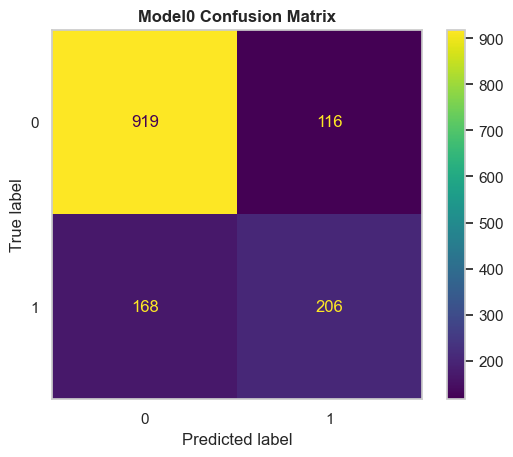

<Figure size 800x600 with 0 Axes>

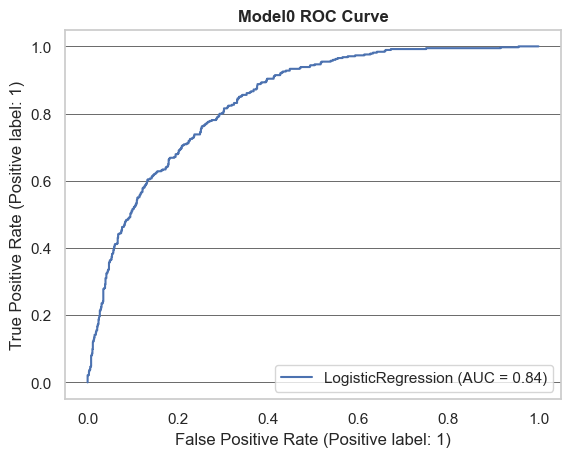

Model Report:               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.64      0.55      0.59       374

    accuracy                           0.80      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409


Accuracy Score: 0.7984386089425124

ROC_AUC Score: 0.8391123511328115

Precison Score: 0.639751552795031

F1 Score: 0.5919540229885057

Recall Score: 0.5508021390374331


In [769]:
# importing libraries
from sklearn.metrics import (classification_report, recall_score, f1_score, roc_auc_score, RocCurveDisplay,
                            accuracy_score, precision_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve)

# predicting the X_teX_test_scaled
y_pred = model0.predict(X_test_scaled)

y_proba = model0.predict_proba(X_test_scaled)[:, 1]

# Displaying the Confusion matrix
cm = confusion_matrix(y_test, y_pred)
matrix = ConfusionMatrixDisplay(confusion_matrix = cm)
plt.figure(figsize = (8, 6))
matrix.plot()
plt.grid(False)
plt.title('Model0 Confusion Matrix', weight = 'bold')
plt.show()

#ROC Curve Display
plt.figure(figsize = (8, 6))
RocCurveDisplay.from_estimator(model0, X_test_scaled, y_test)
plt.title('Model0 ROC Curve', weight = 'bold')
plt.show()

# Get the scores for my model
print(f'Model Report: {classification_report(y_test, y_pred)}')
print(f'\nAccuracy Score: {accuracy_score(y_test, y_pred)}')
print(f'\nROC_AUC Score: {roc_auc_score(y_test, y_proba)}')
print(f'\nPrecison Score: {precision_score(y_test, y_pred)}')
print(f'\nF1 Score: {f1_score(y_test, y_pred)}')
print(f'\nRecall Score: {recall_score(y_test, y_pred)}')

- **The scores above show that my model is doing well but could do better especially with precision score so for that I need to do feature selection to try and see which fetures have low impact on my model and try and do another model after droping the features**

##### Feature Selection

In [772]:
# Importing libraries
from sklearn.feature_selection import RFE

selector = RFE(LogisticRegression(), n_features_to_select=10)
selector.fit(X_train_scaled, y_train)

selected_features = X.columns[selector.support_]
print(selected_features)

Index(['tenure', 'MonthlyCharges', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'StreamingTV_No internet service',
       'StreamingTV_Yes', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year'],
      dtype='object')


**From the code cell above the top 10 features with the bigest impact are:**
- tenure
- MonthlyCharges
- MultipleLines_Yes
- InternetService_Fiber optic
- StreamingTV_No internet service
- StreamingTV_Yes
- StreamingMovies_No internet service
- StreamingMovies_Yes
- Contract_One year
- Contract_Two year

So I will build another model(model1) to compare how it does with the 1st model(model0)


<Figure size 800x600 with 0 Axes>

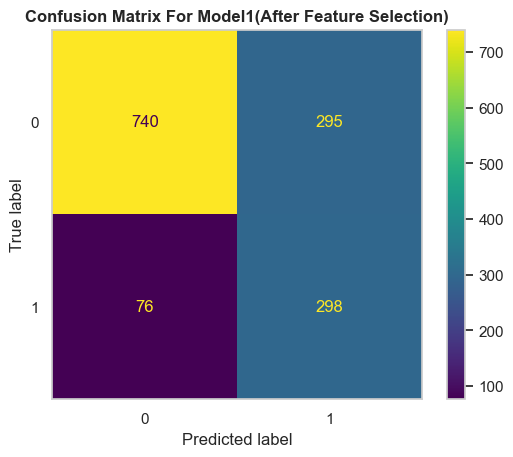

<Figure size 800x600 with 0 Axes>

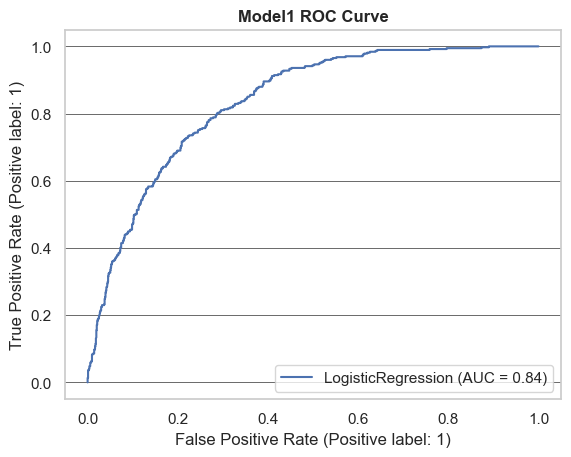

Model Report:               precision    recall  f1-score   support

           0       0.91      0.71      0.80      1035
           1       0.50      0.80      0.62       374

    accuracy                           0.74      1409
   macro avg       0.70      0.76      0.71      1409
weighted avg       0.80      0.74      0.75      1409


Accuracy Score: 0.7366926898509581

ROC_AUC Score: 0.8353625771784339

Precison Score: 0.5025295109612141

F1 Score: 0.6163391933815925

Recall Score: 0.7967914438502673


In [775]:
# Building Model1
# Top 10 selected features
top_features = [
    'tenure',
    'MonthlyCharges',
    'MultipleLines_Yes',
    'InternetService_Fiber optic',
    'StreamingTV_No internet service',
    'StreamingTV_Yes',
    'StreamingMovies_No internet service',
    'StreamingMovies_Yes',
    'Contract_One year',
    'Contract_Two year'
]
# Variable initialization
X_top = df_encoded[top_features]
y = df_encoded['Churn_Yes']

# Split
X_train_top, X_test_top, y_train, y_test = train_test_split(X_top, y, test_size = 0.2, random_state = 42, stratify = y)

# Scale
scaler1 = StandardScaler()
X_train_top_scaled = scaler1.fit_transform(X_train_top)
X_test_top_scaled = scaler1.transform(X_test_top)

# Build and fit Model1
model1 = LogisticRegression(class_weight = 'balanced', random_state = 42)
model1.fit(X_train_top_scaled, y_train)

# Predict y_test
y_pred2 = model1.predict(X_test_top_scaled)

#Model1 Probability Prediction
y_proba2 = model1.predict_proba(X_test_top_scaled)[:, 1]

# Confusion Matrix display for Model1
cm1 = confusion_matrix(y_test, y_pred2)
matrix1 = ConfusionMatrixDisplay(confusion_matrix = cm1)
plt.figure(figsize = (8, 6))
matrix1.plot()
plt.grid(False)
plt.title('Confusion Matrix For Model1(After Feature Selection)', weight = 'bold')
plt.show()

# ROC Curve for model1
plt.figure(figsize = (8, 6))
RocCurveDisplay.from_estimator(model1, X_test_top_scaled, y_test)
plt.title('Model1 ROC Curve', weight = 'bold')
plt.show()

# Model Evaluation
print(f'Model Report: {classification_report(y_test, y_pred2)}')
print(f'\nAccuracy Score: {accuracy_score(y_test, y_pred2)}')
print(f'\nROC_AUC Score: {roc_auc_score(y_test, y_proba2)}')
print(f'\nPrecison Score: {precision_score(y_test, y_pred2)}')
print(f'\nF1 Score: {f1_score(y_test, y_pred2)}')
print(f'\nRecall Score: {recall_score(y_test, y_pred2)}')

##### Visual comparison of the two models using ROC Curve

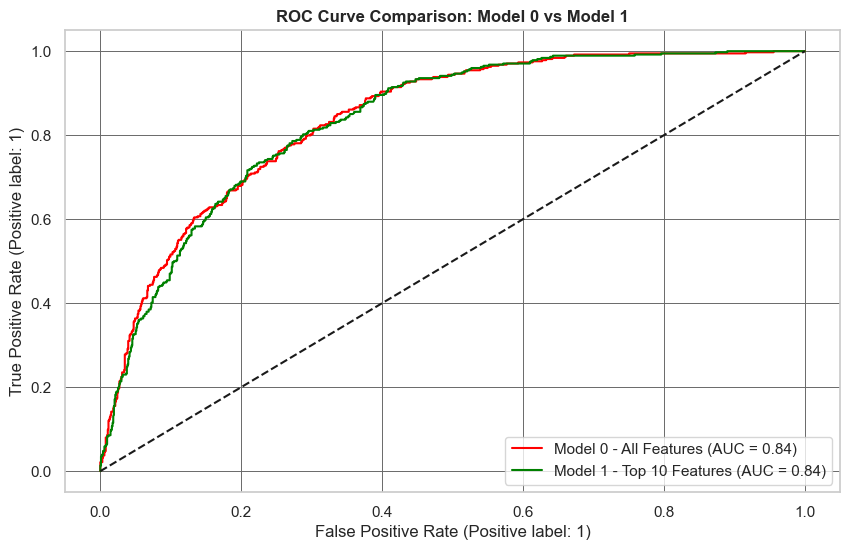

In [835]:
plt.figure(figsize=(10, 6))
RocCurveDisplay.from_predictions(y_test, y_proba, name='Model 0 - All Features', color='red', ax=plt.gca())
RocCurveDisplay.from_predictions(y_test, y_proba2, name='Model 1 - Top 10 Features', color='green', ax=plt.gca())
plt.title('ROC Curve Comparison: Model 0 vs Model 1', weight='bold')
plt.grid(True)
plt.plot([0, 1], [0, 1], 'k--')
plt.savefig('images\Comparing 2 Logistic models.jpg', dpi=300, bbox_inches='tight')
plt.show()

**CONCLUSION :**
- Both Logistic Regression models (with all features vs. top 10 features) perform almost identically.

- Simplifying the model (Model1) did not compromise performance, which is great.

- But since scores are plateauing, it's time to try a different type of model that can:

    - Capture non-linear relationships,

    - Handle interactions between features,

    - Possibly improve recall or precision, especially on the minority class

#### Decision Tree Classifier Modeling

##### Buildin a base Decision Tree Model

<Figure size 800x600 with 0 Axes>

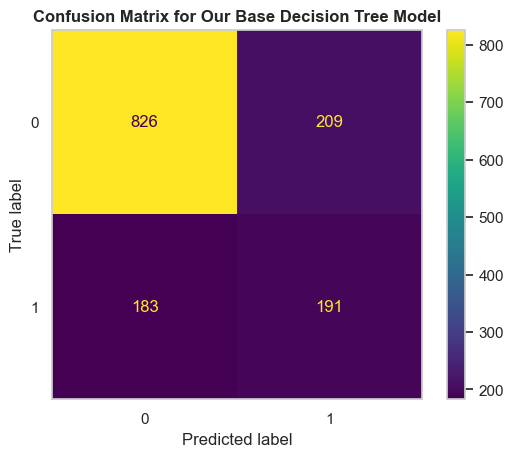

<Figure size 800x600 with 0 Axes>

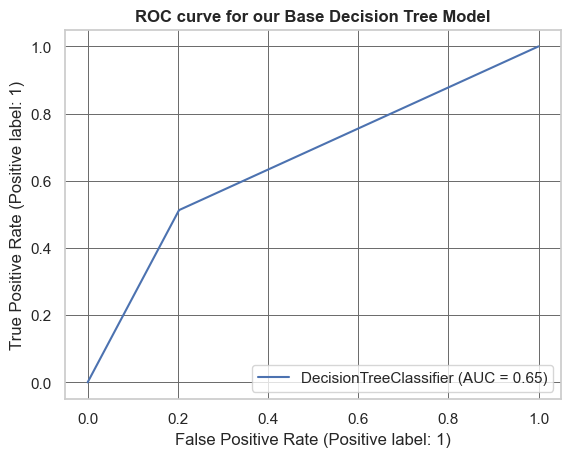

Model Report:               precision    recall  f1-score   support

           0       0.82      0.80      0.81      1035
           1       0.48      0.51      0.49       374

    accuracy                           0.72      1409
   macro avg       0.65      0.65      0.65      1409
weighted avg       0.73      0.72      0.72      1409


Accuracy Score: 0.7217885024840313

ROC_AUC Score: 0.6549755870727738

Precison Score: 0.4775

F1 Score: 0.49354005167958653

Recall Score: 0.5106951871657754


In [839]:
# Import libraries
from sklearn.tree import DecisionTreeClassifier

# Since the variables were identified in our earlier model we can use them as they are
# Model initialization, fiting and training
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_scaled, y_train)

# Predict y_test
ydt_pred = dt_model.predict(X_test_scaled)

#Get y probability predictions for roc_auc score
ydt_proba = dt_model.predict_proba(X_test_scaled)[:, 1]

# Plot confusion matrix for our base Decision tree model
dt_cm = confusion_matrix(y_test, ydt_pred)
dt_matrix = ConfusionMatrixDisplay(confusion_matrix = dt_cm)
plt.figure(figsize = (8, 6))
dt_matrix.plot()
plt.title('Confusion Matrix for Our Base Decision Tree Model', weight = 'bold')
plt.grid(False)
plt.show()

# Ploting ROC curve for our Base Decision Tree Model
plt.figure(figsize = (8, 6))
RocCurveDisplay.from_estimator(dt_model, X_test_scaled, y_test)
plt.title('ROC curve for our Base Decision Tree Model', weight = 'bold')
plt.grid(True)
plt.savefig('images\Base Decision Tree Model.jpg', dpi=300, bbox_inches='tight')
plt.show()

# Model Evaluation Metrics
print(f'Model Report: {classification_report(y_test, ydt_pred)}')
print(f'\nAccuracy Score: {accuracy_score(y_test, ydt_pred)}')
print(f'\nROC_AUC Score: {roc_auc_score(y_test, ydt_proba)}')
print(f'\nPrecison Score: {precision_score(y_test, ydt_pred)}')
print(f'\nF1 Score: {f1_score(y_test, ydt_pred)}')
print(f'\nRecall Score: {recall_score(y_test, ydt_pred)}')

##### Optimizing My Decision Tree Model

<Figure size 800x600 with 0 Axes>

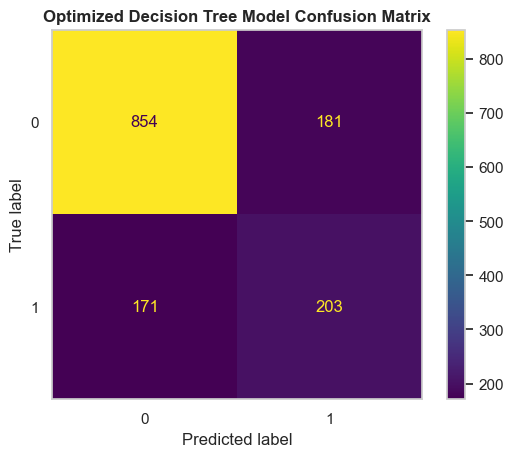

<Figure size 800x600 with 0 Axes>

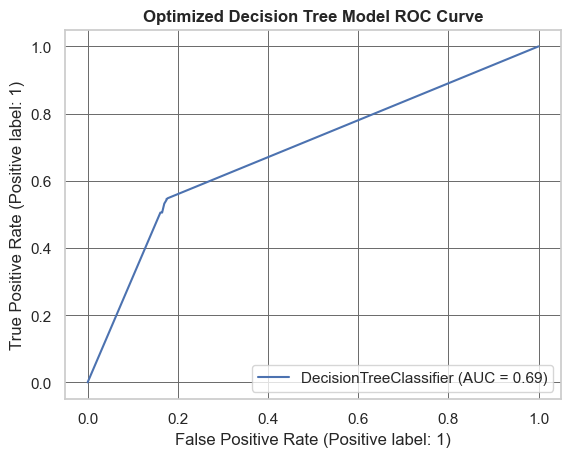

Model Report:               precision    recall  f1-score   support

           0       0.83      0.83      0.83      1035
           1       0.53      0.54      0.54       374

    accuracy                           0.75      1409
   macro avg       0.68      0.68      0.68      1409
weighted avg       0.75      0.75      0.75      1409


Accuracy Score: 0.7501774308019872

ROC_AUC Score: 0.6858624609263996

Precison Score: 0.5286458333333334

F1 Score: 0.5356200527704486

Recall Score: 0.5427807486631016


In [784]:
#build fit and train the model with the top 10 featuures
odt_model = DecisionTreeClassifier(class_weight = 'balanced', random_state = 42)
odt_model.fit(X_train_top_scaled, y_train)

# Predict the y_test values
ydt_pred2 = odt_model.predict(X_test_top_scaled)

# Get the probability predictions of y_test
ydt_proba2 = odt_model.predict_proba(X_test_top_scaled)[:, 1]

# Plot the confusion matrix for the optimized model
odt_cm = confusion_matrix(y_test, ydt_pred2)
odt_matrix = ConfusionMatrixDisplay(confusion_matrix = odt_cm)
plt.figure(figsize = (8, 6))
odt_matrix.plot()
plt.title('Optimized Decision Tree Model Confusion Matrix', weight = 'bold')
plt.grid(False)
plt.show()

# Ploting ROC Curve for the Optimized Decision Tree Model
plt.figure(figsize = (8, 6))
RocCurveDisplay.from_estimator(odt_model, X_test_top_scaled, y_test)
plt.title('Optimized Decision Tree Model ROC Curve', weight = 'bold')
plt.grid(True)
plt.show()

# Evaluating the Optimized Model Metrics
print(f'Model Report: {classification_report(y_test, ydt_pred2)}')
print(f'\nAccuracy Score: {accuracy_score(y_test, ydt_pred2)}')
print(f'\nROC_AUC Score: {roc_auc_score(y_test, ydt_proba2)}')
print(f'\nPrecison Score: {precision_score(y_test, ydt_pred2)}')
print(f'\nF1 Score: {f1_score(y_test, ydt_pred2)}')
print(f'\nRecall Score: {recall_score(y_test, ydt_pred2)}')

##### Optimizing My Decision Tree Model using GridSearchCV

In [786]:
from sklearn.model_selection import GridSearchCV

# Define the model
dt = DecisionTreeClassifier(random_state=42)

# Set the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'class_weight': [None, 'balanced']
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

# Fit the grid search to your training data
grid_search.fit(X_train_top_scaled, y_train)

# Get the best estimator
best_dt = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)

# Predict using best model
y_pred_best = best_dt.predict(X_test_top_scaled)
y_proba_best = best_dt.predict_proba(X_test_top_scaled)[:, 1]

# Evaluate
print(classification_report(y_test, y_pred_best))
print("ROC_AUC:", roc_auc_score(y_test, y_proba_best))

Fitting 5 folds for each of 180 candidates, totalling 900 fits
Best parameters: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
              precision    recall  f1-score   support

           0       0.89      0.78      0.83      1035
           1       0.55      0.73      0.63       374

    accuracy                           0.77      1409
   macro avg       0.72      0.76      0.73      1409
weighted avg       0.80      0.77      0.78      1409

ROC_AUC: 0.8364824717765895


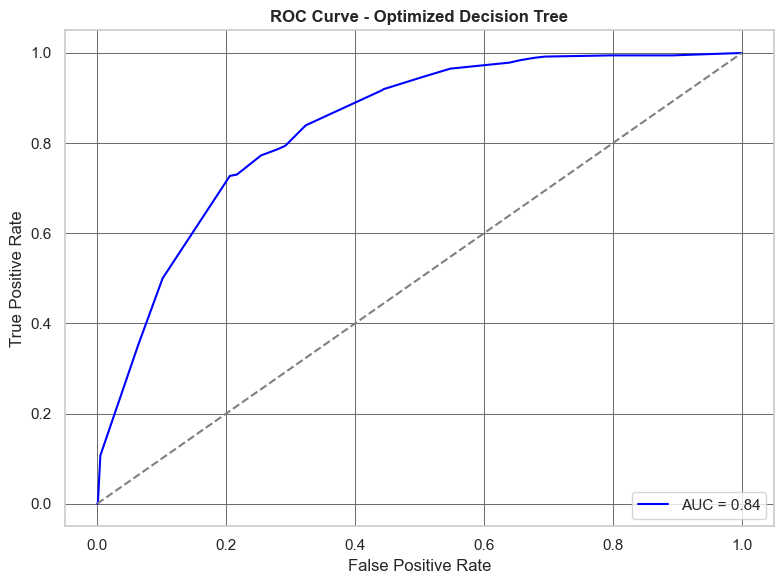

<Figure size 800x600 with 0 Axes>

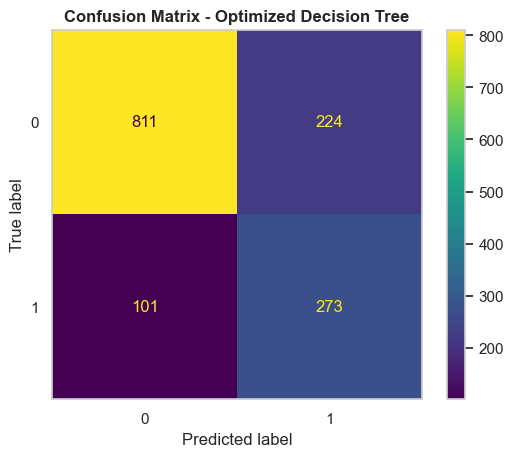

In [787]:
# Ploting the confusion and the Roc curve of the GridSearchCV model
# Predict probabilities
y_probs = best_dt.predict_proba(X_test_top_scaled)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_probs):.2f}', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curve - Optimized Decision Tree', weight = 'bold')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# Confusion Matrix Plot

# Predict class labels
y_pred = best_dt.predict(X_test_top_scaled)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot
plt.figure(figsize = (8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_dt.classes_)
disp.plot()
plt.title('Confusion Matrix - Optimized Decision Tree', weight = 'bold')
plt.grid(False)
plt.show()

##### Ploting the tree structure

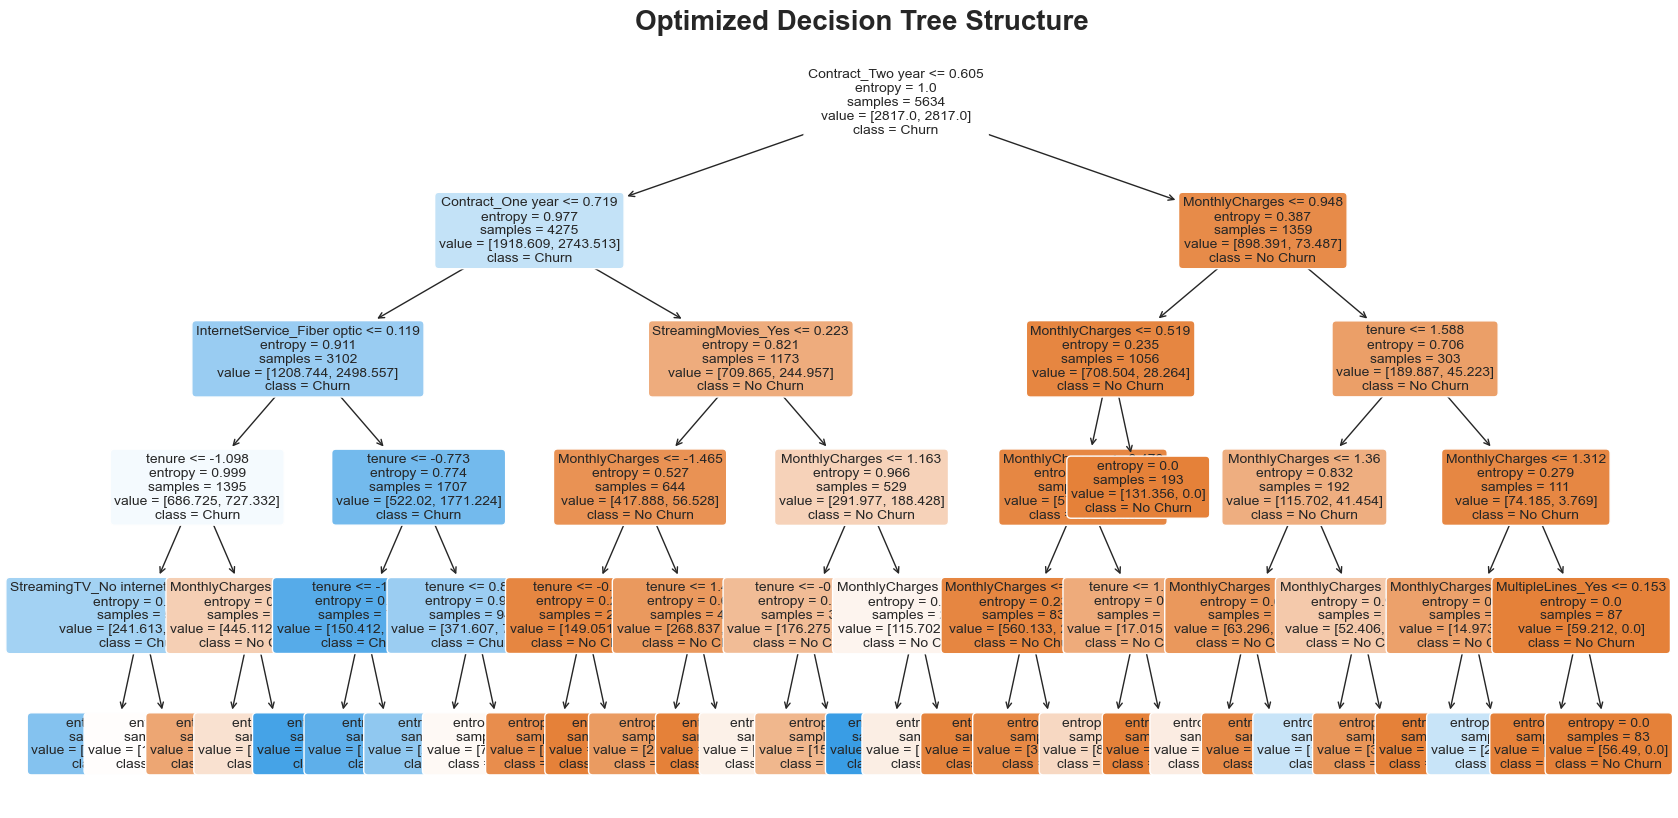

In [789]:
# Importing libraries
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))  # Adjust size as needed
plot_tree(best_dt, 
          feature_names=X_train_top.columns,  # original feature names before scaling
          class_names=['No Churn', 'Churn'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Optimized Decision Tree Structure", weight = 'bold', fontsize = 20)
plt.savefig('images\Decision Tree Structure.jpg', dpi=300, bbox_inches='tight')
plt.show()

The plot above shows how my decisson tree model is structured

##### PLoting the 3 Decision  Models

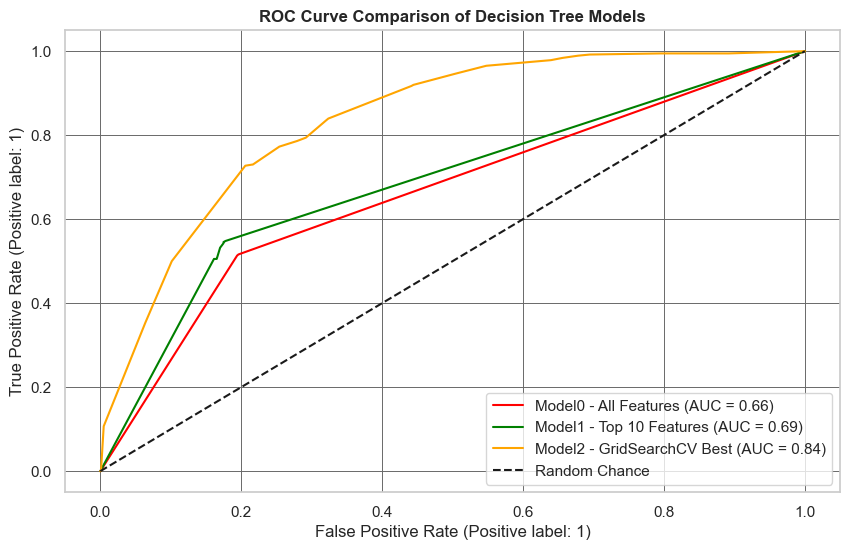

In [837]:
plt.figure(figsize=(10, 6))
RocCurveDisplay.from_predictions(y_test, ydt_proba, name='Model0 - All Features', color='red', ax=plt.gca())
RocCurveDisplay.from_predictions(y_test, ydt_proba2, name='Model1 - Top 10 Features', color='green', ax=plt.gca())
RocCurveDisplay.from_predictions(y_test, y_proba_best, name='Model2 - GridSearchCV Best', color='orange', ax=plt.gca())

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.title('ROC Curve Comparison of Decision Tree Models', weight='bold')
plt.grid(True)
plt.legend()
plt.savefig('images\Comparing 3 diffrent decission tree models.jpg', dpi=300, bbox_inches='tight')
plt.show()

**CONCLUSION**
- Using GridSearchCV greatly improved the performance of my model
- Compared to the base model and the top 10 feature model:
  - The ROC-AUC score improved
  - Better recall for the minority class
  - More balanced precision and f1-score
- This highlights the importance of hyperparameter tuning in boosting classification model performance, especially in imbalanced datasets.

### Conclusion

In this project, we successfully built and evaluated several classification models to predict customer churn in a telecom company. Through thorough data cleaning, exploration, and modeling, we identified patterns and customer behaviors associated with churn.

Key insights include:

- Contract type plays a major role: customers on month-to-month contracts are significantly more likely to churn than those with one or two-year contracts.

- Lack of tech support and security services correlates strongly with churn.

- Electronic payment methods show a higher churn rate compared to other payment methods.

- Customers with short tenure, indicating newer users, are more likely to leave.

**Modeling results:**

- Our baseline Decision Tree model achieved fair performance, but using top features and applying hyperparameter tuning via GridSearchCV significantly improved metrics.

- The best performing model (optimized Decision Tree) achieved:

    - Accuracy: ~77%

    - Recall (Churn class): ~73%

    - ROC AUC: ~0.84

- This model is interpretable, aligns well with business logic, and provides insight into which features drive churn decisions.

### Recommendations

Based on our findings, we recommend the telecom provider take the following actions to reduce churn:

1. **Incentivize Long-Term Contracts**
    - Offer discounts or loyalty rewards for 1- or 2-year contracts to discourage month-to-month churners.

2. **Improve Tech Support and Security Offerings**
    - Promote bundled services including Tech Support, Online Backup, and Device Protection.

    - Ensure customers are aware of these services and their benefits.

3. **Address Short-Tenure Churn**
    - Implement an onboarding and retention strategy within the first 6 months to engage new customers and reduce early churn.

4. **Reconsider Payment Method Incentives**
    - Encourage alternative payment methods over electronic checks, which correlate with higher churn.

    - Explore if this is related to demographic or service dissatisfaction.

5. **Target At-Risk Segments**
    - Use the model to score and flag high-risk customers regularly.

    - Send targeted retention offers or interventions to those most likely to churn.

## STREAMLIT DEMO 

In [849]:
import pickle

with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_dt, file)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler1, f)
